In [4]:
import warnings
warnings.filterwarnings("ignore")
# for warning 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp
pd.set_option('display.max_columns', 123) # to display all the columns
pd.set_option('display.max_rows', 500) # to display all the rows

# Introduction
### In this notebook, we have mainly focused on analyzing previous_application.csv i.e. 
### data about previous application of an applicant.

In [6]:
#importing module
app_data = pd.read_csv("application_data.csv")
pre_app_data =pd.read_csv("previous_application.csv")

## read dataset

In [7]:
print (pre_app_data.shape)
print (app_data.shape)

(1670214, 37)
(307511, 122)


In [8]:
# Additional columns and common columns in app_data and pre_app_data
additional_feat = []
common_feat = []

for col in app_data.columns:
    if col not in pre_app_data.columns:
        additional_feat.append(col)
    else:
        common_feat.append(col)
        
print(len(additional_feat))
print(len(common_feat))
print(common_feat)

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


# note

### SK_ID_CURR is an unique identifier, which will use to merge the relevant columns

In [9]:
## data cleaning 

# Function_name : data_missing
# Usage : Returns % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing categories having missing values and % of missing values in those categories

def data_missing(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [10]:
md_p = data_missing(pre_app_data) ### focusing on previous data missing
md_p.sort_values('percentage', ascending=False)




category  percentage
5       RATE_INTEREST_PRIMARY   99.643698
6    RATE_INTEREST_PRIVILEGED   99.643698
2            AMT_DOWN_PAYMENT   53.636480
4           RATE_DOWN_PAYMENT   53.636480
7             NAME_TYPE_SUITE   49.119754
10         DAYS_FIRST_DRAWING   40.298129
11             DAYS_FIRST_DUE   40.298129
12  DAYS_LAST_DUE_1ST_VERSION   40.298129
13              DAYS_LAST_DUE   40.298129
14           DAYS_TERMINATION   40.298129
15  NFLAG_INSURED_ON_APPROVAL   40.298129
3             AMT_GOODS_PRICE   23.081773
0                 AMT_ANNUITY   22.286665
8                 CNT_PAYMENT   22.286366
9         PRODUCT_COMBINATION    0.020716
1                  AMT_CREDIT    0.000060

In [11]:
print ("total misssing column in previous application data set ",len (md_p.sort_values('percentage', ascending=False)))

total misssing column in previous application data set  16


In [12]:
pre_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [13]:
pre_app_data.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
pre_app_data.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

#Checking the remaining columns
pre_app_data.head()



SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CASH_LOAN_PURPOSE  \
0                       1                0.0                    XAP   
1                       1                NaN                    XNA   
2                       1                NaN                    XNA   
3                       1                NaN                    XNA   
4                       1                NaN                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP              NaN         Repeater              Mobile   
1                XAP    Unaccompanied         Repeater                 XNA   
2                XAP  Spouse, partner         Repeater                 XNA   
3                XAP              NaN         Repeater                 XNA   
4                 HC              NaN         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA             Country-wide                35   
1           Cash            x-sell           Contact center                -1   
2           Cash            x-sell  Credit and cash offices                -1   
3           Cash            x-sell  Credit and cash offices                -1   
4           Cash           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1                  XNA         36.0       low_action   
2                  XNA         12.0             high   
3                  XNA         12.0           middle   
4                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2         Cash X-Sell: high            365243.0          -271.0   
3       Cash X-Sell: middle            365243.0          -482.0   
4         Cash Street: high                 NaN             NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0          -42.0             -37.0   
1                      916.0       365243.0          365243.0   
2      

#  extracting numeric data from pre_app_data

In [14]:

numeric_features = []
for col in pre_app_data.columns:
    if pre_app_data[col].dtype == float or pre_app_data[col].dtype == int:
        numeric_features.append(col)
        
print(numeric_features)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [15]:
prev_num = pd.DataFrame()

for col in numeric_features:
    prev_num[col] = pre_app_data[col]
    
prev_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297978 non-null  float64
 1   AMT_APPLICATION            1669867 non-null  float64
 2   AMT_CREDIT                 1669867 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   CNT_PAYMENT                1297983 non-null  float64
 7   DAYS_FIRST_DRAWING         997149 non-null   float64
 8   DAYS_FIRST_DUE             997149 non-null   float64
 9   DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 10  DAYS_LAST_DUE              997149 non-null   float64
 11  DAYS_TERMINATION           997149 non-null   float64
 12  NFLAG_INSURED_ON_APPROVAL  997149 non-null   float64
dtypes: float64(1

In [ ]:
##checking for corelation 

plt.figure(figsize=(25,15)) ## fig size by defualt float
sns.heatmap(prev_num.corr(),linewidths=5,vmin=0.25, annot=True)
plt.show()

#### we can see that day_last_due and days_termination corelation is high = 0.93

#### days_first drawing  and days _last _due_ist version  top negetive corelation = 1


In [ ]:
pre_app_data.info(verbose=True,null_counts = True) ##  verbose = to print the full summery, null_counts = check the nullvalue

In [ ]:
print(pre_app_data['NAME_TYPE_SUITE'].value_counts())

print ('/n')

print(pre_app_data['NAME_TYPE_SUITE'].value_counts().cumsum()*100.0)

# filling the missing value 

In [ ]:
pre_app_data['NAME_TYPE_SUITE'].fillna(pre_app_data.NAME_TYPE_SUITE.mode()[0], inplace=True)

### Merging only required columns of application_data with previous_application_data

In [ ]:
p_merged = pd.merge(app_data[['SK_ID_CURR', 'TARGET']],pre_app_data , how='left', on=['SK_ID_CURR'])

p_merged.info()

#  checking for numeric data

In [ ]:
p_merged.describe() ## provide statistical input for future analysis

# will check outlier of some of the column

#### amount_annuity outliers

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(p_merged['AMT_ANNUITY'])
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(p_merged['AMT_DOWN_PAYMENT'])
plt.show()

### droping 99 percentile for AMT_ANNUITY and AMT_DOWN_PAYMENT

In [ ]:
p_merged = p_merged[p_merged['AMT_ANNUITY'] < np.nanpercentile(p_merged['AMT_ANNUITY'], 99)]
p_merged = p_merged[p_merged['AMT_DOWN_PAYMENT'] < np.nanpercentile(p_merged['AMT_DOWN_PAYMENT'], 99)]

In [ ]:
#sainity check

plt.figure(figsize=(10,2))
sns.boxplot(p_merged['AMT_ANNUITY'])
plt.show()

In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(p_merged['AMT_DOWN_PAYMENT'])
plt.show()

In [ ]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(p_merged['NAME_CONTRACT_STATUS'], hue=p_merged['TARGET'])
plt.show()

In [ ]:
approved_loan = p_merged[p_merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_loan = p_merged[(p_merged['TARGET'] == 1) & (p_merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_loan*100/approved_loan))

In [ ]:
t_r_l = p_merged[p_merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_loan = p_merged[(p_merged['TARGET'] == 0) & (p_merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_loan*100/t_r_l))

In [ ]:
plt.title("Payment Status")
sns.countplot(p_merged['TARGET'])
plt.show()

In [ ]:

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,70000), title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,70000), title="Defaulter")

sns.scatterplot(p_merged[p_merged["TARGET"] == 0]['AMT_ANNUITY'], p_merged[p_merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1)
sns.scatterplot(p_merged[p_merged["TARGET"] == 1]['AMT_ANNUITY'], p_merged[p_merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2)

plt.show()

# note

### 1. from higher down payment defulter are less in data

# analysi of catagorical loan

In [ ]:
sns.countplot(p_merged.NAME_CONTRACT_TYPE, hue=p_merged.TARGET)
plt.show()


print ("Highest number of loans are applied for Consumer Loans")

In [ ]:
sns.countplot(p_merged[p_merged['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=p_merged.TARGET)
plt.show()

print ("As seen in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.")

# work with application data . 

app_data.head()


In [ ]:
app_data.head()
print (app_data.shape)
print (app_data.columns, ) 
print (app_data.info(null_counts = True))

In [ ]:
print (app_data.dtypes.value_counts())

print ("##############count of dtype")

# null percentage check for app_data

In [ ]:

print(app_data.isnull().sum()/len(app_data)*100)

In [ ]:
#Removing the Columns with null percentage over 50%
for col in app_data.columns:
    if sum(app_data[col].isnull())/float(len(app_data.index))>0.5:
        del app_data[col]

In [ ]:
#Check of null perecetage after removal of Columns 
print(app_data.isnull().sum()/len(app_data)*100)

# 13%_data_columns = 
1.AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY /n
            2.AMT_REQ_CREDIT_BUREAU_WEEK
3.AMT_REQ_CREDIT_BUREAU_MON
4.AMT_REQ_CREDIT_BUREAU_QRT
5.AMT_REQ_CREDIT_BUREAU_YEAR

In [ ]:
#Checking the Data Types of the Data frame 
app_data.dtypes

In [ ]:
#Changing the values of Column to Age from days
app_data['Age']=app_data['DAYS_BIRTH'].abs()/365

In [ ]:
#Changing the values of Column to Years from days
app_data['YEAR_EMPLOYED']=app_data['DAYS_EMPLOYED'].abs()/365
print(app_data['YEAR_EMPLOYED'])

In [ ]:
#Changing the values of Column to Years from days
app_data['YEAR_REGISTRATION']=app_data['DAYS_REGISTRATION'].abs()/365
#Changing the values of Column to Years from days
app_data['YEAR_LAST_PHONE_CHANGE']=app_data['DAYS_LAST_PHONE_CHANGE'].abs()/365
#Changing the values of Column to Years from days
app_data['YEAR_ID_PUBLISH']=app_data['DAYS_ID_PUBLISH'].abs()/365

In [ ]:
#Changing the values of Column to Years from days
app_data['YEAR_ID_PUBLISH']=app_data['DAYS_ID_PUBLISH'].abs()/365

#Changing the values of Column to Years from days
app_data['YEAR_LAST_PHONE_CHANGE']=app_data['DAYS_LAST_PHONE_CHANGE'].abs()/365

In [ ]:
app_data.head()

In [ ]:
#Dropping the Days Columns 

app_data=app_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'], axis = 1) 

In [ ]:
app_data.head()

In [ ]:
# Adding  a new column which is credit_amount/Annuity 
app_data['AMT_CREDIT_ANNUITY_CURR']=app_data['AMT_CREDIT']/app_data['AMT_ANNUITY']
app_data.head()

In [ ]:
app_data.describe(include=[np.number])

# checking the outliner 

In [ ]:
plt.figure(figsize=[12,3])
sns.boxplot(app_data.AMT_ANNUITY) ##AMT_ANNUITY
plt.show()


plt.figure(figsize=[12,3]) ### AMT_CREDIT
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

plt.figure(figsize=[12,3])
ax2=sns.boxplot(app_data.AMT_INCOME_TOTAL) ### AMT_INCOME_TOTAL
ax2.set(xscale="log")
plt.show()


plt.figure(figsize=[12,3]) ###AMT_GOODS_PRICE
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()


plt.figure(figsize=[12,3])
ax2=sns.boxplot(app_data.YEAR_EMPLOYED)#### YEAR_EMPLOYED
ax2.set(xscale="log")
plt.show()

In [ ]:
data_app.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.99,0.999])

In [ ]:
Q1 = data_app.quantile(0.25)
Q3 = data_app.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
app_data.Age.describe()

In [ ]:
#Taking suitable bins and assigning them in a new column 'Binned' 
bins = [10, 20, 30, 40, 50, 60, 70, 100 ]
app_data['Age_group'] = pd.cut(app_data['Age'], bins)
app_data.head()

In [ ]:
#Selecting AMT_INCOME_TOTAL Column for the Second Binning Process, Analysing the max and min of the Age column in Dataframe
app_data.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f'))

In [ ]:
bins = [25000, 100000, 1000000, 2000000 , 5000000, 10000000, 117000000 ]
labels =['lower','lower middle', 'middle','higher middle','rich','Super rich']
app_data['Class'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins,labels=labels)
app_data.head()

In [ ]:
app_data.Class.value_counts()
#Analysing the binned Data Income of customers as Class

In [53]:
#Checking the imbalance percentage
print(app_data.TARGET.value_counts()/len(app_data)*100)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


In [54]:
#DATAFRAME OF ALL OTHER THAN DEFAULTERS
target_0=app_data[app_data['TARGET']==0]
target_0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307505               Y             0          112500.0    225000.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1           35698.5        1129500.0           Family         State servant   
2            6750.0         135000.0    Unaccompanied               Working   
3           29686.5         297000.0    Unaccompanied               Working   
4           21865.5         513000.0    Unaccompanied               Working   
5           27517.5         454500.0  Spouse, partner         State servant   
...             ...              ...              ...                   ...   
307505      22050.0         225000.0    Unaccompanied             Pensioner   
307506      27558.0         225000.0    Unaccompanied               Working   
307507      12001.5         225000.0    Unaccompanied             Pensioner   
307508      29979.0         585000.0    Unaccompanied               Working   
307510      49117.5         675000.0    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  FLAG_MOBIL  \
1       House / apartment                    0.003541           1   
2       House / apartment                    0.010032           1   
3       House / apartment                    0.008019           1   
4       House / apartment                    0.028663           1   
5       House / apartment                    0.035792           1   
...                   ...                         ...         ...   
307505  House / apartment                    0.022800           1   
307506       With pa

In [55]:
#DATAFRAME OF DEFAULTERS
target_1=app_data[app_data['TARGET']==1]
target_1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
26                   Y             0          112500.0    979992.0   
40                   Y             0          202500.0   1193580.0   
42                   N             0          135000.0    288873.0   
81                   Y             0           81000.0    252000.0   
...                ...           ...               ...         ...   
307448               N             1          207000.0    450000.0   
307475               N             1          144000.0   1303200.0   
307481               Y             0          225000.0    297000.0   
307489               Y             0          225000.0    521280.0   
307509               Y             0          171000.0    370107.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
26          27076.5         702000.0   Unaccompanied               Working   
40          35028.0         855000.0   Unaccompanied  Commercial associate   
42          16258.5         238500.0   Unaccompanied               Working   
81          14593.5         252000.0   Unaccompanied             Pensioner   
...             ...              ...             ...                   ...   
307448      32746.5         450000.0   Unaccompanied               Working   
307475      46809.0        1125000.0   Unaccompanied               Working   
307481      19975.5         297000.0          Family               Working   
307489      23089.5         450000.0   Unaccompanied  Commercial associate   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
26      Secondary / secondary special                 Widow   
40      Secondary / secondary special               Married   
42      Secondary / secondary special        Civil marriage   
81      Secondary / secondary special               Married   
...                               ...                   ...   
307448  Secondary / secondary special               Married   
307475               Higher education        Civil marriage   
307481  Secondary / secondary special               Married   
307489  Secondary / secondary special        Civil marriage   
307509  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  FLAG_MOBIL  \
0       House / apartment                    0.018801           1   
26      House / apartment                    0.018029           1   
40      House / apartment                    0.025164           1   
42      House / apartment                    0.007305           1   
81      House / apartment                    0.028663           1   
...                   ...                         ...         ...   
307448  House / apartment                    0.020246           1   
307475  House / apartment       

In [56]:
#UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES ACROSS TARGET
features = ['CODE_GENDER', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'Class','NAME_CONTRACT_TYPE']
list(enumerate(features))

[(0, 'CODE_GENDER'),
 (1, 'OCCUPATION_TYPE'),
 (2, 'NAME_FAMILY_STATUS'),
 (3, 'Class'),
 (4, 'NAME_CONTRACT_TYPE')]

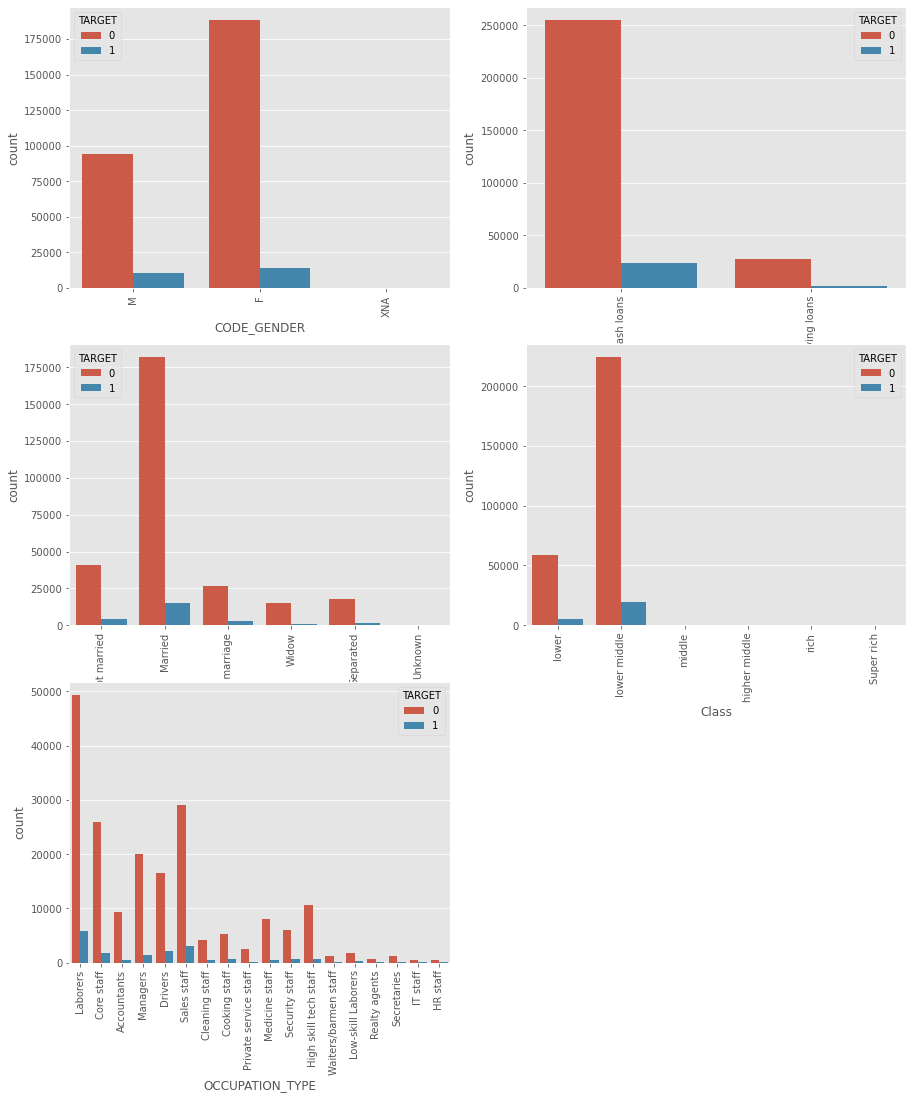

In [57]:
features = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'Class','OCCUPATION_TYPE']
plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = app_data)
    plt.xlabel(i[1])
    plt.xticks(rotation = 90)

# app_data

defaulters being high in Laboreres section. #Also non-defaulters being high in laborers, followed by Sales Staff and by Core staff. # We can conclude that Laboreres take more loans than anyone else and most of them pay on time

# bivariate analysis

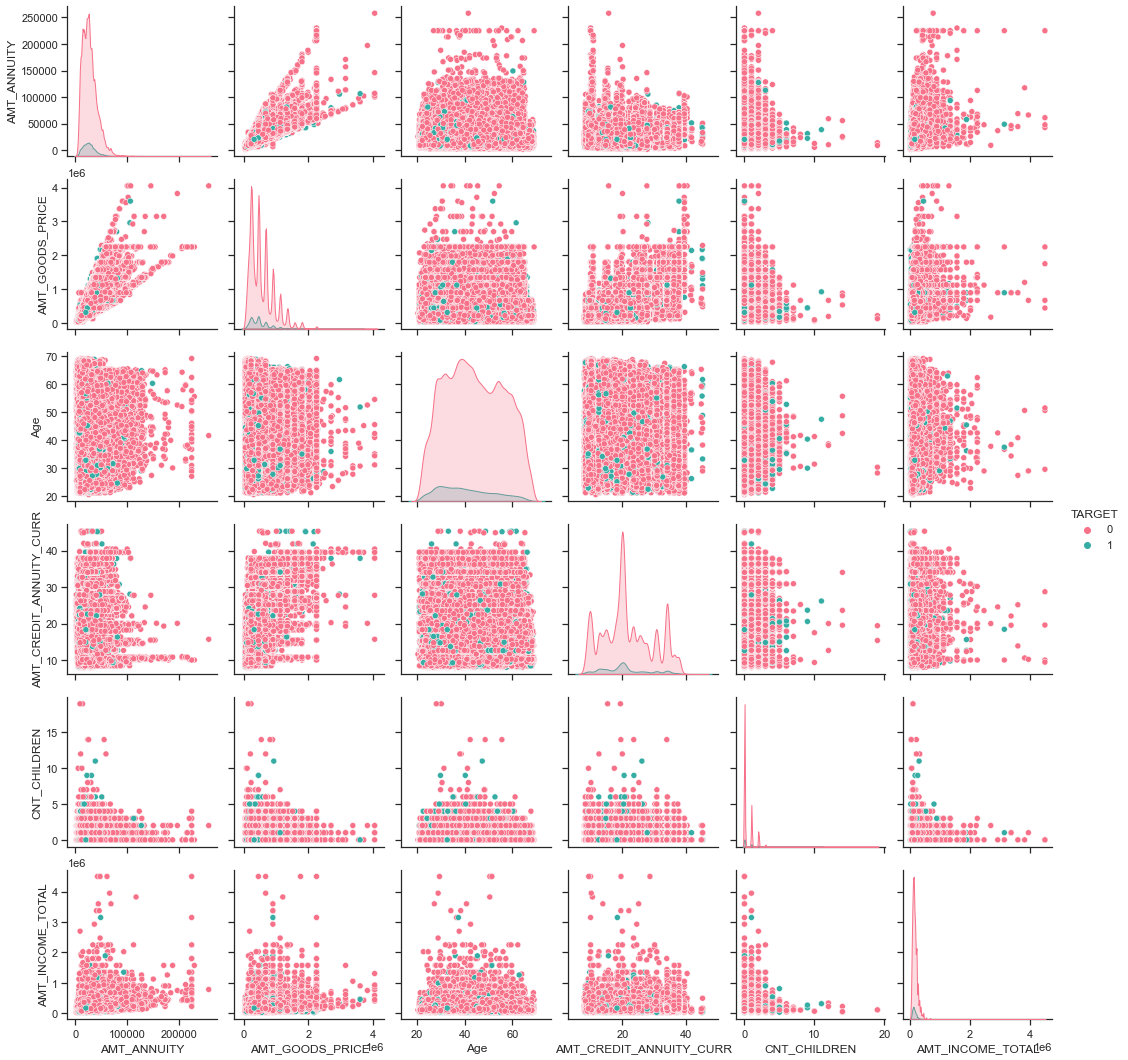

In [58]:
#Bivariate Analysis of  Continuous Variables( After removal of Outliers in AMT_INCOME_TOTAL for easy analysis)

t_1=app_data[app_data['AMT_INCOME_TOTAL']<5000000.0]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(t_1,hue='TARGET',palette="husl",
                 vars=['AMT_ANNUITY','AMT_GOODS_PRICE','Age','AMT_CREDIT_ANNUITY_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL'])


# Analysis of Bi- Variate Categorical data: Here are few aspects seen from above, Overall we are seeing a non-Defaulters topping the Defaulters in evert aspect.

1) FROM AMT_ANUUITY vs AMT_GOOD_PRICE , we can conclude Higher goods_price leads to Higher Annuity.

2) From AMT_ANNUITY VS AGE , we can conclude people with higher age pay higher Annuity.

3) From CNT_CHILDREN VS ANNUITY , We can conclude person with less number of children can pay more Annuity.(So usually 1 or 2)

4) From AMT_ANNUITY vs AMT_INCOME_TOTAL , we can conclude that higher income leading to paying higher Annuity.

5) From AMT_CREDIT_ANNUITY vs ANNUITY , we can conclude that as ANNUITY increases, AMT_CREDIT_ANNUITY_CURR decreses.